In [1]:
import torchvision.transforms as transforms
from torchvision import datasets
from dataset.digit import ChanDup
import pandas as pd
import seaborn as sns
from pl_module.timm import LitTimm
from tqdm.auto import tqdm
import numpy as np
from sklearn.manifold import TSNE
from dataset.digit import CENDataset

In [2]:
class MNISTConfig:
    task="digit"
    backbone_name="lenet"
    root_tgt=None
    model_name="timm"
    root="/shared/lorenzo/mnist-zsda/MNIST_G"
    optimizer="adam"
    batch_size=64
    lr=1e-3
    num_classes=10
    num_test_sets=0
    

config = MNISTConfig()
model = LitTimm.load_from_checkpoint("/root/dezsda/checkpoints/timm-lenet-epoch=03-task=digit-val_loss=0.0297.ckpt", config=config).model

  0%|          | 0/60000 [00:00<?, ?it/s]

<AxesSubplot:xlabel='0', ylabel='1'>

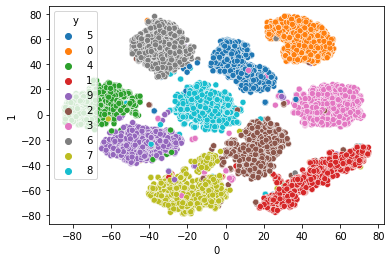

In [3]:
transform = transform = transforms.Compose([
    # transforms.Resize(32),
    transforms.CenterCrop((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]),
    ChanDup(),
])

dataset = datasets.MNIST(
    root="/shared/lorenzo/mnist-zsda/MNIST_G", 
    train=True, 
    download=True, 
    transform=transform
)

samples = []
samples_target = []
for batch in tqdm(dataset):
    img, target = batch
    features = model.get_feature(img.unsqueeze(0))
    samples.append(features.squeeze(0).detach().numpy().astype(np.float16))
    samples_target.append(target)

    if len(samples) >= 10000:
        break

X = np.stack(samples)
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(X)
df = pd.DataFrame(X_embedded)
df["y"] = samples_target
df["y"] = df["y"].astype(str)
sns.scatterplot(data=df, x=0, y=1, hue="y")

  0%|          | 0/60000 [00:00<?, ?it/s]

<AxesSubplot:xlabel='0', ylabel='1'>

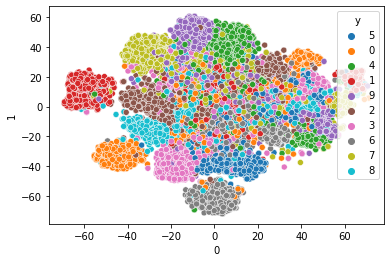

In [4]:
transform = transform = transforms.Compose([
    # transforms.Resize(32),
    transforms.CenterCrop((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]),
    ChanDup(),
])

dataset = CENDataset(
    root="/shared/lorenzo/mnist-zsda/MNIST_C", 
    train=True, 
    transform=transform
)

samples = []
samples_target = []
for batch in tqdm(dataset):
    img, target = batch
    features = model.get_feature(img.unsqueeze(0))
    samples.append(features.squeeze(0).detach().numpy().astype(np.float16))
    samples_target.append(target)

    if len(samples) >= 10000:
        break

X = np.stack(samples)
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(X)
df = pd.DataFrame(X_embedded)
df["y"] = samples_target
df["y"] = df["y"].astype(str)
sns.scatterplot(data=df, x=0, y=1, hue="y")